**Brian Blaylock**  
**May 30, 2019**

# Rap and HRRR boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray

In [12]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, pluck_hrrr_point
from BB_HRRR.HRRR_paths import get_domains, get_RAP_path
from BB_HRRR.RAP_NOMADS import get_rap_variable

from BB_cmap.reflectivity_cmap import reflect_ncdc

In [3]:
domains = get_domains()
RAP_path = get_RAP_path()

HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762


In [11]:
DATE = datetime(2018, 5, 16, 2)
Hrefc = get_hrrr_variable(DATE, 'REFC:entire')
H500 = get_hrrr_variable(DATE, 'HGT:500 mb') 


 >> Dowloading tempfile: ./temp_hrrr_2018051602_f00_REF.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180516/hrrr.t02z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180516/hrrr.t02z.wrfsfcf00.grib2.idx
 >> Matched a variable:  1:0:d=2018051602:REFC:entire atmosphere:anl:
 >> Byte Range: 0 534944
  Run Date: 2018-05-16 02:00 UTC F00
Valid Date: 2018-05-16 02:00 UTC

 >> Dowloading tempfile: ./temp_hrrr_2018051602_f00_HGT.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180516/hrrr.t02z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20180516/hrrr.t02z.wrfsfcf00.grib2.idx
 >> Matched a variable:  11:6422917:d=2018051602:HGT:500 mb:anl:
 >> Byte Range: 6422917 7161906
  Run Date: 2018-05-16 02:00 UTC F00
Valid Date: 2018-05-16 02:00 UTC


In [13]:
c = reflect_ncdc()

In [8]:
# Geostationary projection
m = ccrs.Orthographic(central_longitude=-106, central_latitude=54, globe=None)

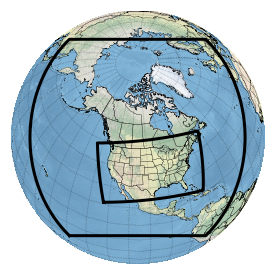

In [17]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1, projection=m)


# Get and plot HRRR boundaries from HRRR grid
xx = domains['HRRR']['path'].vertices[:,0]
yy = domains['HRRR']['path'].vertices[:,1]
ax1.plot(xx,yy,
         linewidth=3, color='k', linestyle='-', transform=ccrs.PlateCarree())


## Get and plot RAP boundaries from geo_em file (it is in two parts)
ax1.plot(RAP_path['part1']['lon'], RAP_path['part1']['lat'],
         linewidth=3, color='k', linestyle='-', transform=ccrs.PlateCarree())
ax1.plot(RAP_path['part2']['lon'], RAP_path['part2']['lat'],
         linewidth=3, color='k', linestyle='-', transform=ccrs.PlateCarree())

'''
# plot reflectivity and 500 mb height
ax1.pcolormesh(Hrefc['lon'], Hrefc['lat'], Hrefc['value'],
               cmap=c['cmap'], vmax=c['vmax'], vmin=c['vmin'],
               transform=ccrs.PlateCarree())
ax1.contour(H500['lon'], H500['lat'], H500['value'],
            levels=range(5040, 6181, 60), colors='k',
            transform=ccrs.PlateCarree())
'''

res = '50m'
ax1.coastlines(resolution=res, color='black', linewidth=.3)
ax1.add_feature(ccrs.cartopy.feature.BORDERS.with_scale(res), linewidth=.3)
ax1.add_feature(ccrs.cartopy.feature.STATES.with_scale(res), linewidth=.2)


ax1.gridlines(color='k', linestyle=(0, (1, 1)), alpha=.25,
              xlocs=range(0, 380, 10),
              ylocs=range(-90, 90, 10))
ax1.set_global()
ax1.stock_img()
ax1.outline_patch.set_visible(False)

plt.savefig('RAP-HRRR_bounaries', dpi=300, bbox_inches='tight')